In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [2]:
data = pd.read_csv('mimic CA.csv')
data

,stay_id,subject_id,gender,anchor_age,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2
0,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-19 18:07:00,114.0,85.0,60.0,18.0,37.3,96.0
1,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-19 18:18:00,111.0,85.0,60.0,19.0,37.3,96.0
2,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-19 18:32:00,108.0,85.0,60.0,20.0,37.3,95.0
3,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-19 20:00:00,111.0,85.0,60.0,18.0,37.3,96.0
4,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-19 20:15:00,111.0,85.0,60.0,22.0,37.3,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68968,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 06:40:00,85.0,88.0,33.0,11.0,37.5,99.0
68969,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 07:00:00,95.0,88.0,33.0,16.0,37.7,99.0
68970,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 08:00:00,100.0,88.0,33.0,18.0,37.8,99.0
68971,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 09:00:00,104.0,88.0,33.0,22.0,37.8,98.0


In [3]:
print(data['stay_id'].nunique())

479


In [4]:
# 將時間欄位轉換成 datetime 格式
data['starttime'] = pd.to_datetime(data['starttime'])
data['charttime'] = pd.to_datetime(data['charttime'])

In [5]:
# 將每位患者分成一人一組
group_data = data.groupby(['stay_id'])
group_data

In [6]:
# 去除每位患者CA前48小時更之前的資料 
def delete_hours(group):
    time_column = 'starttime'
    target_column = 'charttime'
    
    time_threshold = group[time_column] - timedelta(hours=48)
    group = group[group[target_column] >= time_threshold]
    
    return group

groups = group_data.apply(delete_hours)
groups

stay_id  subject_id gender  anchor_age           starttime  \
stay_id                                                                       
30031755 107    30031755    19867017      F          74 2124-04-24 17:00:00   
         108    30031755    19867017      F          74 2124-04-24 17:00:00   
         109    30031755    19867017      F          74 2124-04-24 17:00:00   
         110    30031755    19867017      F          74 2124-04-24 17:00:00   
         111    30031755    19867017      F          74 2124-04-24 17:00:00   
...                  ...         ...    ...         ...                 ...   
39992578 68968  39992578    19774838      M          69 2187-09-15 10:00:00   
         68969  39992578    19774838      M          69 2187-09-15 10:00:00   
         68970  39992578    19774838      M          69 2187-09-15 10:00:00   
         68971  39992578    19774838      M          69 2187-09-15 10:00:00   
         68972  39992578    19774838      M          69 2187-09-15 10:00:00   

                         charttime  heart_rate  sbp_ni  dbp_ni  resp_rate  \
stay_id                                                                     
30031755 107   2124-04-22 17:00:00        94.0    95.0    56.0       11.0   
         108   2124-04-22 17:11:00        96.0    90.0    56.0       14.0   
         109   2124-04-22 19:00:00        98.0    84.0    57.0       17.0   
         110   2124-04-22 20:00:00        94.0    88.0    29.0       17.0   
         111   2124-04-22 20:02:00        98.0    83.0    29.0       16.0   
...                            ...         ...     ...     ...        ...   
39992578 68968 2187-09-15 06:40:00        85.0    88.0    33.0       11.0   
         68969 2187-09-15 07:00:00        95.0    88.0    33.0       16.0   
         68970 2187-09-15 08:00:00       100.0    88.0    33.0       18.0   
         68971 2187-09-15 09:00:00       104.0    88.0    33.0       22.0   
         68972 2187-09-15 10:00:00        90.0    88.0    33.0       18.0   

                temperature  spo2  
stay_id                            
30031755 107           35.3  93.0  
         108           35.3  94.0  
         109           35.3  99.0  
         110           35.2  98.0  
         111           35.2  97.0  
...                     ...   ...  
39992578 68968         37.5  99.0  
         68969         37.7  99.0  
         68970         37.8  99.0  
         68971         37.8  98.0  
         68972         37.8  98.0  

[22705 rows x 12 columns]

In [7]:
print(groups['stay_id'].nunique())

479


In [8]:
groups.reset_index(drop=True, inplace=True)
groups

,stay_id,subject_id,gender,anchor_age,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2
0,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-22 17:00:00,94.0,95.0,56.0,11.0,35.3,93.0
1,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-22 17:11:00,96.0,90.0,56.0,14.0,35.3,94.0
2,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-22 19:00:00,98.0,84.0,57.0,17.0,35.3,99.0
3,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-22 20:00:00,94.0,88.0,29.0,17.0,35.2,98.0
4,30031755,19867017,F,74,2124-04-24 17:00:00,2124-04-22 20:02:00,98.0,83.0,29.0,16.0,35.2,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22700,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 06:40:00,85.0,88.0,33.0,11.0,37.5,99.0
22701,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 07:00:00,95.0,88.0,33.0,16.0,37.7,99.0
22702,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 08:00:00,100.0,88.0,33.0,18.0,37.8,99.0
22703,39992578,19774838,M,69,2187-09-15 10:00:00,2187-09-15 09:00:00,104.0,88.0,33.0,22.0,37.8,98.0


In [9]:
# 正樣本
positive = pd.DataFrame()

groupss = groups.groupby('stay_id')

for group_id, group_df in groupss:
    
    # 選擇每位患者CA前一小時到前五小時的資料
    end_time_df1 = group_df['starttime']- timedelta(hours=1)
    start_time_df1 = group_df['starttime'] - timedelta(hours=5)
    
    group_df1 = group_df[(group_df['charttime'] >= start_time_df1) & (group_df['charttime'] <= end_time_df1)]
    
    # 將每位患者此區間的每一筆資料，依照對應的時間將資料選取出來(當筆、前四小時、前八小時到前二十小時)
    for index, row in group_df1.iterrows():
        end_time_df2 = row['charttime']
        time_ranges = [20, 16, 12, 8, 4, 0]
        
        for hours in time_ranges:
            start_time_df2 = end_time_df2 - timedelta(hours=hours)
            
            # 選取後將資料新增到新的dataframe
            data_point = group_df[(group_df['charttime'] >= start_time_df2) & (group_df['charttime'] <= start_time_df2)]
            
            # 若沒有抓到資料，就選擇正負三十分鐘內的隨機一筆資料
            if data_point.empty:
                minutes = pd.to_timedelta(30, unit='m')
                data_point = group_df[(group_df['charttime'] >= (start_time_df2-minutes)) & (group_df['charttime'] <= (start_time_df2-minutes))].head(1)
            
            # 每位患者的每筆樣本若不到六個資料點，就用0來補值
            if data_point.empty:
                data_point = pd.DataFrame({'stay_id': [group_id] * 1,
                          'starttime': [np.nan] * 1,
                          'charttime': [np.nan] * 1,
                          'heart_rate': [0] * 1,
                          'sbp_ni': [0] * 1,
                          'dbp_ni': [0] * 1,
                          'resp_rate': [0] * 1,
                          'temperature': [0] * 1,
                          'spo2': [0] * 1})
            
            positive = pd.concat([positive, data_point])

positive.reset_index(drop=True, inplace=True)
positive1 = positive[['stay_id', 'starttime', 'charttime', 'heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature' ,'spo2']]
positive1

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2
0,30031755,2124-04-24 17:00:00,2124-04-23 16:00:00,98.0,84.0,47.0,14.0,36.4,95.0
1,30031755,2124-04-24 17:00:00,2124-04-23 20:00:00,97.0,75.0,48.0,11.0,36.2,97.0
2,30031755,2124-04-24 17:00:00,2124-04-24 00:00:00,87.0,78.0,48.0,16.0,36.0,96.0
3,30031755,2124-04-24 17:00:00,2124-04-24 04:00:00,91.0,74.0,44.0,16.0,35.9,89.0
4,30031755,2124-04-24 17:00:00,2124-04-24 08:00:00,92.0,81.0,47.0,15.0,35.8,91.0
...,...,...,...,...,...,...,...,...,...
20767,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
20768,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
20769,39992578,2187-09-15 10:00:00,2187-09-15 01:00:00,80.0,86.0,37.0,18.0,36.5,100.0
20770,39992578,2187-09-15 10:00:00,2187-09-15 05:00:00,83.0,87.0,35.0,16.0,36.6,100.0


In [10]:
print(positive1['stay_id'].nunique())

418


In [11]:
# 負樣本
# 將每位患者其他時間點的資料作為負樣本

def select_data(group):
    time_ranges = [49, 45, 41, 37, 32, 29, 25, 21, 17, 13, 9, 5] 
    
    selected_data = []

    for hours in time_ranges:
        end_time = group['starttime'] - pd.to_timedelta(hours, unit='h')
        selected_group = group[(group['charttime'] >= end_time) & (group['charttime'] <= end_time)]

        if selected_group.empty:
            minutes = pd.to_timedelta(30, unit='m')
            selected_group = group[(group['charttime'] >= (end_time - minutes)) & (group['charttime'] <= (end_time + minutes))].head(1)
            
        selected_data.append(selected_group)

    return pd.concat(selected_data, ignore_index=True)

negative = groups.groupby('stay_id').apply(select_data)
negative.reset_index(drop=True, inplace=True)
negative = negative[['stay_id', 'starttime', 'charttime', 'heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature' ,'spo2']]
negative

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2
0,30031755,2124-04-24 17:00:00,2124-04-22 20:00:00,94.0,88.0,29.0,17.0,35.2,98.0
1,30031755,2124-04-24 17:00:00,2124-04-23 00:00:00,99.0,86.0,48.0,12.0,35.1,97.0
2,30031755,2124-04-24 17:00:00,2124-04-23 04:00:00,105.0,96.0,56.0,18.0,35.2,97.0
3,30031755,2124-04-24 17:00:00,2124-04-23 09:00:00,106.0,84.0,52.0,16.0,35.9,95.0
4,30031755,2124-04-24 17:00:00,2124-04-23 12:00:00,87.0,82.0,46.0,15.0,35.8,91.0
...,...,...,...,...,...,...,...,...,...
2752,39950840,2147-06-22 18:30:00,2147-06-22 05:00:00,74.0,80.0,53.0,26.0,36.6,58.0
2753,39950840,2147-06-22 18:30:00,2147-06-22 09:00:00,73.0,82.0,49.0,29.0,37.3,84.0
2754,39950840,2147-06-22 18:30:00,2147-06-22 13:00:00,79.0,83.0,46.0,30.0,37.1,98.0
2755,39992578,2187-09-15 10:00:00,2187-09-15 01:00:00,80.0,86.0,37.0,18.0,36.5,100.0


In [12]:
negative.describe()

,stay_id,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2
count,2.757000e+03,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000
mean,3.485922e+07,90.700036,109.035183,60.997098,21.549148,36.779144,96.018136
std,2.639102e+06,20.202198,22.872553,15.026609,6.333229,0.933246,5.413292
min,3.003176e+07,31.000000,40.000000,14.000000,1.000000,30.500000,23.000000
25%,3.287005e+07,77.000000,94.000000,50.000000,17.000000,36.400000,95.000000
50%,3.494831e+07,90.000000,107.000000,61.000000,21.000000,36.800000,97.000000
75%,3.678966e+07,103.000000,122.000000,71.000000,25.000000,37.200000,99.000000
max,3.999258e+07,199.000000,235.000000,143.000000,58.000000,41.400000,100.000000


In [13]:
# 考慮患者剛入院，不會一次跳出六筆測量資料
# 在每位患者一開始的資料新增5行未知的資料(在features中填入0或NaN)，使input維持特定shape(6,6)
new_rows = []

for group, group_data in negative.groupby('stay_id'):

    front_rows = pd.DataFrame({'stay_id': [group] * 5, 'starttime': [None] * 5, 'charttime': [None] * 5,
                               'heart_rate': [0] * 5, 'sbp_ni': [0] * 5, 'dbp_ni': [0] * 5,
                               'resp_rate': [0] * 5, 'temperature': [0] * 5, 'spo2': [0] * 5})
    
    new_rows.extend([front_rows, group_data])

negative1 = pd.concat(new_rows, ignore_index=True)
negative1

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2
0,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
1,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
2,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
3,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
4,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4567,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
4568,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
4569,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0
4570,39992578,2187-09-15 10:00:00,2187-09-15 01:00:00,80.0,86.0,37.0,18.0,36.5,100.0


In [14]:
print(negative1['stay_id'].nunique())

363


In [15]:
# 存放正樣本的dataframe
pos_sampless = pd.DataFrame()

pos_samples = []

order = 1

window_size = 6


for group, group_data in positive1.groupby('stay_id'):
    group_len = len(group_data)

    for i in range(0, group_len, 6):
        pos_sample = group_data.iloc[i:i + window_size]
        pos_sample = pos_sample.copy()
        pos_sample['order'] = order
        pos_samples.append(pos_sample)
        order += 1
        
pos_sampless = pd.concat(pos_samples)
pos_sampless.reset_index(drop=True, inplace=True)
pos_sampless

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order
0,30031755,2124-04-24 17:00:00,2124-04-23 16:00:00,98.0,84.0,47.0,14.0,36.4,95.0,1
1,30031755,2124-04-24 17:00:00,2124-04-23 20:00:00,97.0,75.0,48.0,11.0,36.2,97.0,1
2,30031755,2124-04-24 17:00:00,2124-04-24 00:00:00,87.0,78.0,48.0,16.0,36.0,96.0,1
3,30031755,2124-04-24 17:00:00,2124-04-24 04:00:00,91.0,74.0,44.0,16.0,35.9,89.0,1
4,30031755,2124-04-24 17:00:00,2124-04-24 08:00:00,92.0,81.0,47.0,15.0,35.8,91.0,1
...,...,...,...,...,...,...,...,...,...,...
20767,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,3462
20768,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,3462
20769,39992578,2187-09-15 10:00:00,2187-09-15 01:00:00,80.0,86.0,37.0,18.0,36.5,100.0,3462
20770,39992578,2187-09-15 10:00:00,2187-09-15 05:00:00,83.0,87.0,35.0,16.0,36.6,100.0,3462


In [16]:
# 存放正樣本的list
pos_samples

[    stay_id           starttime           charttime  heart_rate  sbp_ni  \
 0  30031755 2124-04-24 17:00:00 2124-04-23 16:00:00        98.0    84.0   
 1  30031755 2124-04-24 17:00:00 2124-04-23 20:00:00        97.0    75.0   
 2  30031755 2124-04-24 17:00:00 2124-04-24 00:00:00        87.0    78.0   
 3  30031755 2124-04-24 17:00:00 2124-04-24 04:00:00        91.0    74.0   
 4  30031755 2124-04-24 17:00:00 2124-04-24 08:00:00        92.0    81.0   
 5  30031755 2124-04-24 17:00:00 2124-04-24 12:00:00        93.0    94.0   
 
    dbp_ni  resp_rate  temperature  spo2  order  
 0    47.0       14.0         36.4  95.0      1  
 1    48.0       11.0         36.2  97.0      1  
 2    48.0       16.0         36.0  96.0      1  
 3    44.0       16.0         35.9  89.0      1  
 4    47.0       15.0         35.8  91.0      1  
 5    49.0       17.0         35.6  99.0      1  ,
      stay_id           starttime           charttime  heart_rate  sbp_ni  \
 6   30031755 2124-04-24 17:00:00 2124

In [17]:
pos_sampless.dtypes

stay_id                 int64
starttime      datetime64[ns]
charttime      datetime64[ns]
heart_rate            float64
sbp_ni                float64
dbp_ni                float64
resp_rate             float64
temperature           float64
spo2                  float64
order                   int64
dtype: object

In [18]:
# 計算正樣本中每筆vital sign換算成NEWS的分數
EWS_Scores = []

for row in pos_sampless.itertuples():
    
    # 先判斷所有vital sign是否都為 0
    if all(val == 0 for val in row[4:10]):
        EWS_Scores.append([0])
    else:
        row_ews = []
        if row.resp_rate >= 12 and row.resp_rate <= 20:
            row_ews.append(0)
        elif row.resp_rate >= 9 and row.resp_rate <= 11:
            row_ews.append(1)
        elif row.resp_rate >= 21 and row.resp_rate <= 24:
            row_ews.append(2)
        elif row.resp_rate <= 8 or row.resp_rate >= 25:
            row_ews.append(3)

        if row.spo2 >= 96:
            row_ews.append(0)
        elif row.spo2 >= 94 and row.spo2 <= 95:
            row_ews.append(1)
        elif row.spo2 >= 92 and row.spo2 <= 93:
            row_ews.append(2)
        elif row.spo2 <= 91:
            row_ews.append(3)

        if row.sbp_ni >= 111 and row.sbp_ni <= 219:
            row_ews.append(0)
        elif row.sbp_ni >= 101 and row.sbp_ni <= 110:
            row_ews.append(1)
        elif row.sbp_ni >= 91 and row.sbp_ni <= 100:
            row_ews.append(2)
        elif row.sbp_ni <= 90 or row.sbp_ni >= 220:
            row_ews.append(3)

        if row.heart_rate >= 51 and row.heart_rate <= 90:
            row_ews.append(0)
        elif (row.heart_rate >= 41 and row.heart_rate <= 50) or (row.heart_rate >= 91 and row.heart_rate <= 110):
            row_ews.append(1)
        elif row.heart_rate >= 111 and row.heart_rate <= 130:
            row_ews.append(2)
        elif row.heart_rate <= 40 or row.heart_rate >= 131:
            row_ews.append(3)

        if row.temperature >= 36.1 and row.temperature <= 38.0:
            row_ews.append(0)
        elif (row.temperature >= 35.1 and row.temperature <= 36) or (row.temperature >= 38.1 and row.temperature <= 39.0):
            row_ews.append(1)
        elif row.temperature >= 39.1:
            row_ews.append(2)
        elif row.temperature <= 35:
            row_ews.append(3)

        EWS_Scores.append(row_ews)

ews_list = []
for scores in EWS_Scores:
    ews = sum(scores)
    ews_list.append(ews)

pos_sampless['EWS'] = ews_list
pos_sampless

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order,EWS
0,30031755,2124-04-24 17:00:00,2124-04-23 16:00:00,98.0,84.0,47.0,14.0,36.4,95.0,1,5
1,30031755,2124-04-24 17:00:00,2124-04-23 20:00:00,97.0,75.0,48.0,11.0,36.2,97.0,1,5
2,30031755,2124-04-24 17:00:00,2124-04-24 00:00:00,87.0,78.0,48.0,16.0,36.0,96.0,1,4
3,30031755,2124-04-24 17:00:00,2124-04-24 04:00:00,91.0,74.0,44.0,16.0,35.9,89.0,1,8
4,30031755,2124-04-24 17:00:00,2124-04-24 08:00:00,92.0,81.0,47.0,15.0,35.8,91.0,1,8
...,...,...,...,...,...,...,...,...,...,...,...
20767,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,3462,0
20768,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,3462,0
20769,39992578,2187-09-15 10:00:00,2187-09-15 01:00:00,80.0,86.0,37.0,18.0,36.5,100.0,3462,3
20770,39992578,2187-09-15 10:00:00,2187-09-15 05:00:00,83.0,87.0,35.0,16.0,36.6,100.0,3462,3


In [19]:
pos_sampless.head(20)

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order,EWS
0,30031755,2124-04-24 17:00:00,2124-04-23 16:00:00,98.0,84.0,47.0,14.0,36.4,95.0,1,5
1,30031755,2124-04-24 17:00:00,2124-04-23 20:00:00,97.0,75.0,48.0,11.0,36.2,97.0,1,5
2,30031755,2124-04-24 17:00:00,2124-04-24 00:00:00,87.0,78.0,48.0,16.0,36.0,96.0,1,4
3,30031755,2124-04-24 17:00:00,2124-04-24 04:00:00,91.0,74.0,44.0,16.0,35.9,89.0,1,8
4,30031755,2124-04-24 17:00:00,2124-04-24 08:00:00,92.0,81.0,47.0,15.0,35.8,91.0,1,8
5,30031755,2124-04-24 17:00:00,2124-04-24 12:00:00,93.0,94.0,49.0,17.0,35.6,99.0,1,4
6,30031755,2124-04-24 17:00:00,2124-04-23 17:00:00,104.0,84.0,42.0,12.0,36.3,99.0,2,4
7,30031755,2124-04-24 17:00:00,2124-04-23 21:00:00,96.0,75.0,50.0,20.0,36.0,98.0,2,5
8,30031755,2124-04-24 17:00:00,2124-04-24 01:00:00,94.0,82.0,49.0,16.0,35.9,100.0,2,5
9,30031755,2124-04-24 17:00:00,2124-04-24 05:00:00,96.0,89.0,58.0,17.0,35.8,96.0,2,5


In [20]:
# 存放負樣本的dataframe
neg_sampless = pd.DataFrame()

neg_samples = []

order = 1

window_size = 6

for group, group_data in negative1.groupby('stay_id'):
    group_len = len(group_data)
    
    for i in range(group_len - window_size + 1):
        neg_sample = group_data.iloc[i:i + window_size]
        neg_sample = neg_sample.copy()
        neg_sample['order'] = order
        neg_samples.append(neg_sample)
        order += 1
    
    if group_len < window_size:
        neg_sample = group_data.copy()
        neg_sample['order'] = order
        neg_samples.append(neg_sample)
        order += 1
        
neg_sampless = pd.concat(neg_samples)
neg_sampless.reset_index(drop=True, inplace=True)
neg_sampless

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order
0,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
1,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
2,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
3,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
4,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
16537,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2757
16538,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2757
16539,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2757
16540,39992578,2187-09-15 10:00:00,2187-09-15 01:00:00,80.0,86.0,37.0,18.0,36.5,100.0,2757


In [21]:
neg_sampless.dtypes

stay_id                 int64
starttime      datetime64[ns]
charttime      datetime64[ns]
heart_rate            float64
sbp_ni                float64
dbp_ni                float64
resp_rate             float64
temperature           float64
spo2                  float64
order                   int64
dtype: object

In [22]:
# 計算負樣本中每筆vital sign換算成NEWS的分數
EWS_Scores = []

for row in neg_sampless.itertuples():
    
    # 先判斷所有vital sign是否都為 0
    if all(val == 0 for val in row[4:10]):
        EWS_Scores.append([0])
    else:
        row_ews = []
        if row.resp_rate >= 12 and row.resp_rate <= 20:
            row_ews.append(0)
        elif row.resp_rate >= 9 and row.resp_rate <= 11:
            row_ews.append(1)
        elif row.resp_rate >= 21 and row.resp_rate <= 24:
            row_ews.append(2)
        elif row.resp_rate <= 8 or row.resp_rate >= 25:
            row_ews.append(3)

        if row.spo2 >= 96:
            row_ews.append(0)
        elif row.spo2 >= 94 and row.spo2 <= 95:
            row_ews.append(1)
        elif row.spo2 >= 92 and row.spo2 <= 93:
            row_ews.append(2)
        elif row.spo2 <= 91:
            row_ews.append(3)

        if row.sbp_ni >= 111 and row.sbp_ni <= 219:
            row_ews.append(0)
        elif row.sbp_ni >= 101 and row.sbp_ni <= 110:
            row_ews.append(1)
        elif row.sbp_ni >= 91 and row.sbp_ni <= 100:
            row_ews.append(2)
        elif row.sbp_ni <= 90 or row.sbp_ni >= 220:
            row_ews.append(3)

        if row.heart_rate >= 51 and row.heart_rate <= 90:
            row_ews.append(0)
        elif (row.heart_rate >= 41 and row.heart_rate <= 50) or (row.heart_rate >= 91 and row.heart_rate <= 110):
            row_ews.append(1)
        elif row.heart_rate >= 111 and row.heart_rate <= 130:
            row_ews.append(2)
        elif row.heart_rate <= 40 or row.heart_rate >= 131:
            row_ews.append(3)

        if row.temperature >= 36.1 and row.temperature <= 38.0:
            row_ews.append(0)
        elif (row.temperature >= 35.1 and row.temperature <= 36) or (row.temperature >= 38.1 and row.temperature <= 39.0):
            row_ews.append(1)
        elif row.temperature >= 39.1:
            row_ews.append(2)
        elif row.temperature <= 35:
            row_ews.append(3)

        EWS_Scores.append(row_ews)

ews_list = []
for scores in EWS_Scores:
    ews = sum(scores)
    ews_list.append(ews)

neg_sampless['EWS'] = ews_list
neg_sampless

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order,EWS
0,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
16537,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2757,0
16538,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2757,0
16539,39992578,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2757,0
16540,39992578,2187-09-15 10:00:00,2187-09-15 01:00:00,80.0,86.0,37.0,18.0,36.5,100.0,2757,3


In [23]:
neg_sampless.head(20)

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order,EWS
0,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
5,30031755,2124-04-24 17:00:00,2124-04-22 20:00:00,94.0,88.0,29.0,17.0,35.2,98.0,1,5
6,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2,0
7,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2,0
8,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2,0
9,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,2,0


In [24]:
# 計算list中元素的數量
print(len(pos_samples))
print(len(neg_samples))

3462
2757


In [25]:
# 選取需要的欄位
pos_samplesss = pos_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order', 'EWS']]
neg_samplesss = neg_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order', 'EWS']]

In [26]:
# 在dataframe新增一欄位為EWS_label，只要每組(六個row)最後一個row的EWS欄位，其中數字大於5，就在該欄位填入1，沒有大於5就填入0
pos = pos_samplesss.copy()
neg = neg_samplesss.copy()
pos['EWS_label'] = (pos.groupby(pos.index // 6)['EWS'].transform('last') >= 5).astype(int)
neg['EWS_label'] = (neg.groupby(neg.index // 6)['EWS'].transform('last') >= 5).astype(int)

In [27]:
# 添加正負樣本的label
pos.insert(0, 'label',1)
neg.insert(0, 'label',0)
pos = pos.groupby(['order', 'label', 'EWS_label'])
neg = neg.groupby(['order', 'label', 'EWS_label'])

In [28]:
# 合併
A = pos.apply(lambda x:x[:])
B = neg.apply(lambda x:x[:])
all_sample = pd.concat([A,B])
all_sample

label  heart_rate  sbp_ni  dbp_ni  resp_rate  \
order label EWS_label                                                       
1     1     0         0          1        98.0    84.0    47.0       14.0   
                      1          1        97.0    75.0    48.0       11.0   
                      2          1        87.0    78.0    48.0       16.0   
                      3          1        91.0    74.0    44.0       16.0   
                      4          1        92.0    81.0    47.0       15.0   
...                            ...         ...     ...     ...        ...   
2757  0     0         16537      0         0.0     0.0     0.0        0.0   
                      16538      0         0.0     0.0     0.0        0.0   
                      16539      0         0.0     0.0     0.0        0.0   
                      16540      0        80.0    86.0    37.0       18.0   
                      16541      0        83.0    87.0    35.0       16.0   

                             temperature   spo2  order  EWS  EWS_label  
order label EWS_label                                                   
1     1     0         0             36.4   95.0      1    5          0  
                      1             36.2   97.0      1    5          0  
                      2             36.0   96.0      1    4          0  
                      3             35.9   89.0      1    8          0  
                      4             35.8   91.0      1    8          0  
...                                  ...    ...    ...  ...        ...  
2757  0     0         16537          0.0    0.0   2757    0          0  
                      16538          0.0    0.0   2757    0          0  
                      16539          0.0    0.0   2757    0          0  
                      16540         36.5  100.0   2757    3          0  
                      16541         36.6  100.0   2757    3          0  

[37314 rows x 10 columns]

In [29]:
all_sample.head(60)

label  heart_rate  sbp_ni  dbp_ni  resp_rate  \
order label EWS_label                                                    
1     1     0         0       1        98.0    84.0    47.0       14.0   
                      1       1        97.0    75.0    48.0       11.0   
                      2       1        87.0    78.0    48.0       16.0   
                      3       1        91.0    74.0    44.0       16.0   
                      4       1        92.0    81.0    47.0       15.0   
                      5       1        93.0    94.0    49.0       17.0   
2     1     0         6       1       104.0    84.0    42.0       12.0   
                      7       1        96.0    75.0    50.0       20.0   
                      8       1        94.0    82.0    49.0       16.0   
                      9       1        96.0    89.0    58.0       17.0   
                      10      1        92.0    78.0    32.0       16.0   
                      11      1        89.0    87.0    48.0       20.0   
3     1     0         12      1       103.0    89.0    53.0       12.0   
                      13      1        93.0    82.0    49.0       15.0   
                      14      1        98.0    80.0    42.0       16.0   
                      15      1        97.0    95.0    49.0       13.0   
                      16      1        91.0    79.0    54.0       16.0   
                      17      1        96.0    99.0    33.0       17.0   
4     1     0         18      1       104.0    76.0    45.0       13.0   
                      19      1        96.0    81.0    52.0       15.0   
                      20      1        92.0    85.0    42.0       16.0   
                      21      1        97.0    86.0    53.0       14.0   
                      22      1        91.0    81.0    20.0       16.0   
                      23      1        92.0   106.0    42.0       16.0   
5     1     0         24      1       104.0    76.0    45.0       13.0   
                      25      1        96.0    81.0    52.0       15.0   
                      26      1        92.0    85.0    42.0       16.0   
                      27      1        97.0    86.0    53.0       14.0   
                      28      1        91.0    81.0    20.0       16.0   
                      29      1        98.0    98.0    32.0       16.0   
6     1     0         30      1         0.0     0.0     0.0        0.0   
                      31      1         0.0     0.0     0.0        0.0   
                      32      1         0.0     0.0     0.0        0.0   
                      33      1         0.0     0.0     0.0        0.0   
                      34      1        91.0    85.0    30.0       15.0   
                      35      1        96.0    91.0    21.0       15.0   
7     1     1         36      1        97.0    75.0    48.0       11.0   
                      37      1        87.0    78.0    48.0       16.0   
                      38      1        91.0    74.0    44.0       16.0   
                      39      1        92.0    81.0    47.0       15.0   
                      40      1        93.0    94.0    49.0       17.0   
                      41      1        95.0    80.0    58.0       15.0   
8     1     1         42      1        77.0   101.0    44.0       22.0   
                      43      1        72.0    93.0    39.0       24.0   
                      44      1        77.0   109.0    46.0       24.0   
                      45      1        73.0    96.0    40.0       31.0   
                      46      1        83.0   102.0    47.0       30.0   
                      47      1        92.0    79.0    35.0       35.0   
9     1     1         48      1         0.0     0.0     0.0        0.0   
                      49      1         0.0     0.0     0.0        0.0   
                      50      1         0.0     0.0     0.0        0.0   
                      51      1         0.0     0.0     0.0        0.0   
                      52      

In [30]:
all_sample.tail(60)

label  heart_rate  sbp_ni  dbp_ni  resp_rate  \
order label EWS_label                                                       
2748  0     0         16482      0         0.0     0.0     0.0        0.0   
                      16483      0        93.0    93.0    72.0       20.0   
                      16484      0        86.0    98.0    52.0       24.0   
                      16485      0       108.0   102.0    62.0       25.0   
                      16486      0       110.0   129.0   100.0       29.0   
                      16487      0       116.0   101.0    82.0       20.0   
2749  0     1         16488      0        93.0    93.0    72.0       20.0   
                      16489      0        86.0    98.0    52.0       24.0   
                      16490      0       108.0   102.0    62.0       25.0   
                      16491      0       110.0   129.0   100.0       29.0   
                      16492      0       116.0   101.0    82.0       20.0   
                      16493      0       108.0    98.0    62.0       22.0   
2750  0     0         16494      0        86.0    98.0    52.0       24.0   
                      16495      0       108.0   102.0    62.0       25.0   
                      16496      0       110.0   129.0   100.0       29.0   
                      16497      0       116.0   101.0    82.0       20.0   
                      16498      0       108.0    98.0    62.0       22.0   
                      16499      0       104.0    93.0    58.0       20.0   
2751  0     1         16500      0       108.0   102.0    62.0       25.0   
                      16501      0       110.0   129.0   100.0       29.0   
                      16502      0       116.0   101.0    82.0       20.0   
                      16503      0       108.0    98.0    62.0       22.0   
                      16504      0       104.0    93.0    58.0       20.0   
                      16505      0       103.0    89.0    58.0       18.0   
2752  0     0         16506      0       110.0   129.0   100.0       29.0   
                      16507      0       116.0   101.0    82.0       20.0   
                      16508      0       108.0    98.0    62.0       22.0   
                      16509      0       104.0    93.0    58.0       20.0   
                      16510      0       103.0    89.0    58.0       18.0   
                      16511      0       110.0    88.0    56.0       20.0   
2753  0     1         16512      0         0.0     0.0     0.0        0.0   
                      16513      0         0.0     0.0     0.0        0.0   
                      16514      0         0.0     0.0     0.0        0.0   
                      16515      0         0.0     0.0     0.0        0.0   
                      16516      0         0.0     0.0     0.0        0.0   
                      16517      0        74.0    80.0    53.0       26.0   
2754  0     1         16518      0         0.0     0.0     0.0        0.0   
                      16519      0         0.0     0.0     0.0        0.0   
                      16520      0         0.0     0.0     0.0        0.0   
                      16521      0         0.0     0.0     0.0        0.0   
                      16522      0        74.0    80.0    53.0       26.0   
                      16523      0        73.0    82.0    49.0       29.0   
2755  0     1         16524      0         0.0     0.0     0.0        0.0   
                      16525      0         0.0     0.0     0.0        0.0   
                      16526      0         0.0     0.0     0.0        0.0   
                      16527      0        74.0    80.0    53.0       26.0   
                      16528      0        73.0    82.0    49.0       29.0   
                      16529      0        79.0    83.0    46.0       30.0   
2756  0     0         16530      0         0.0     0.0     0.0        0.0   
                      16531      0         0.0     0.0     0.0        0.0   
                      165

In [31]:
# y:產生(5240,)的一維資料  # 將dataframe中的label取出，轉成一維矩陣的形式

# 取出特定的column
label_col = all_sample['label']
EWS_label_col = all_sample['EWS_label']

averaged_values = label_col.groupby(np.arange(len(label_col)) // 6).mean()
EWS_averaged_values = EWS_label_col.groupby(np.arange(len(EWS_label_col)) // 6).mean()

# 轉成一維矩陣
y = averaged_values.values
EWS_y = EWS_averaged_values.values

print(y)
print(len(y))
print(y.shape)
print(EWS_y)
print(len(EWS_y))
print(EWS_y.shape)

[1 1 1 ... 0 0 0]
6219
(6219,)
[0 0 0 ... 1 0 0]
6219
(6219,)


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y, EWS_y).ravel()

accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = (2*recall*precision)/(recall+precision)
spec = tn/(fp+tn)
auc_roc = roc_auc_score(y, EWS_y)

print('accuracy: %.2f' %accuracy)
print('precision: %.2f' %precision)
print('recall: %.2f' %recall)
print('spec: %.2f' %spec)
print('f1: %.2f' %f1)
print('auroc: %.2f' %auc_roc)

accuracy: 0.58
precision: 0.63
recall: 0.57
spec: 0.59
f1: 0.60
auroc: 0.58


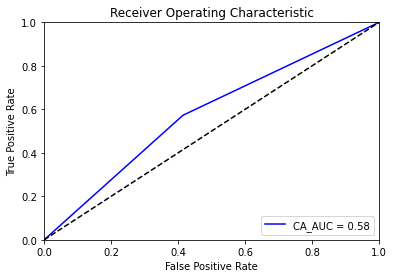

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y, EWS_y)
auc1 = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'blue', label = 'CA_AUC = %0.2f' % auc1)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

In [34]:
# 匯入mimic中無CA的患者資料
noCA = pd.read_csv('mimic nonCA.csv')
noCA

,label,subject_id,stay_id,gender,anchor_age,charttime,heart_rate,resp_rate,sbp_ni,dbp_ni,spo2,temperature
0,0,10018845,35674354,M,91,2184-10-08 04:21:00,83.0,18.0,157.0,70.0,99.0,36.7
1,0,10018845,35674354,M,91,2184-10-08 04:22:00,75.0,16.0,157.0,70.0,99.0,36.7
2,0,10018845,35674354,M,91,2184-10-08 04:23:00,66.0,15.0,157.0,70.0,98.0,36.7
3,0,10018845,35674354,M,91,2184-10-08 04:31:00,58.0,13.0,146.0,60.0,98.0,36.7
4,0,10018845,35674354,M,91,2184-10-08 05:00:00,49.0,11.0,134.0,49.0,96.0,36.6
...,...,...,...,...,...,...,...,...,...,...,...,...
55764,0,19975710,32714049,F,69,2129-11-26 01:01:00,80.0,16.0,151.0,72.0,94.0,36.7
55765,0,19975710,32714049,F,69,2129-11-26 02:00:00,72.0,13.0,140.0,65.0,96.0,36.7
55766,0,19975710,32714049,F,69,2129-11-26 02:01:00,76.0,14.0,128.0,58.0,95.0,36.7
55767,0,19975710,32714049,F,69,2129-11-26 03:00:00,79.0,14.0,141.0,60.0,94.0,36.7


In [35]:
# 新增一欄位starttime，存放nan
noCA = noCA.drop(columns=['label'])
noCA = noCA.assign(starttime=np.nan)
noCA

,subject_id,stay_id,gender,anchor_age,charttime,heart_rate,resp_rate,sbp_ni,dbp_ni,spo2,temperature,starttime
0,10018845,35674354,M,91,2184-10-08 04:21:00,83.0,18.0,157.0,70.0,99.0,36.7,NaN
1,10018845,35674354,M,91,2184-10-08 04:22:00,75.0,16.0,157.0,70.0,99.0,36.7,NaN
2,10018845,35674354,M,91,2184-10-08 04:23:00,66.0,15.0,157.0,70.0,98.0,36.7,NaN
3,10018845,35674354,M,91,2184-10-08 04:31:00,58.0,13.0,146.0,60.0,98.0,36.7,NaN
4,10018845,35674354,M,91,2184-10-08 05:00:00,49.0,11.0,134.0,49.0,96.0,36.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55764,19975710,32714049,F,69,2129-11-26 01:01:00,80.0,16.0,151.0,72.0,94.0,36.7,NaN
55765,19975710,32714049,F,69,2129-11-26 02:00:00,72.0,13.0,140.0,65.0,96.0,36.7,NaN
55766,19975710,32714049,F,69,2129-11-26 02:01:00,76.0,14.0,128.0,58.0,95.0,36.7,NaN
55767,19975710,32714049,F,69,2129-11-26 03:00:00,79.0,14.0,141.0,60.0,94.0,36.7,NaN


In [36]:
# 將時間欄位轉換成 datetime 格式
noCA['charttime'] = pd.to_datetime(noCA['charttime'])

In [37]:
# 重新將每位患者分成一人一組，並找到每個群組中最晚的一筆資料
latest_data = noCA.groupby('stay_id')['charttime'].idxmax()
latest_data = noCA.loc[latest_data]

Negative = pd.DataFrame()

# 設定要選取的時間點
time_ranges = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44]
for _, latest_row in latest_data.iterrows():
    
    for time_range in time_ranges:
        start_time = latest_row['charttime'] - timedelta(hours=time_range)
        end_time = latest_row['charttime'] - timedelta(hours=time_range)

        selected_data = noCA.loc[(noCA['stay_id'] == latest_row['stay_id']) &
                               (noCA['charttime'] >= start_time) &
                               (noCA['charttime'] <= end_time)]
        
        # 如果該時間點沒資料，就取正負三十分鐘範圍的隨機一筆資料
        if  selected_data.empty:
            start_time = latest_row['charttime'] - timedelta(hours=time_range) - timedelta(minutes=10)
            end_time = latest_row['charttime'] - timedelta(hours=time_range) + timedelta(minutes=10)
            selected_data = noCA.loc[(noCA['charttime'] >= start_time) 
                                                  & (noCA['charttime'] <= end_time).sample(n=1)]
        
        Negative = pd.concat([Negative, selected_data])

Negative.reset_index(drop=True, inplace=True)

In [38]:
new_rows = []
for group, group_data in Negative.groupby('stay_id'):
    
    front_rows = pd.DataFrame({'stay_id': [group] * 5, 'starttime': [None] * 5, 'charttime': [None] * 5,
                               'heart_rate': [0] * 5, 'sbp_ni': [0] * 5, 'dbp_ni': [0] * 5,
                               'resp_rate': [0] * 5, 'temperature': [0] * 5, 'spo2': [0] * 5})
    
    new_rows.extend([front_rows, group_data])

Negative1 = pd.concat(new_rows, ignore_index=True)
Negative1 = Negative1[['stay_id', 'starttime', 'charttime', 'heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate', 'temperature' ,'spo2']]
Negative1

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2
0,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0
1,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0
2,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0
3,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0
4,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5774,39967329,NaN,2122-01-24 12:00:00,63.0,122.0,42.0,20.0,36.4,100.0
5775,39967329,NaN,2122-01-24 08:00:00,65.0,138.0,47.0,18.0,36.6,100.0
5776,39967329,NaN,2122-01-24 04:00:00,120.0,126.0,51.0,8.0,36.6,100.0
5777,39967329,NaN,2122-01-24 00:00:00,122.0,136.0,45.0,14.0,36.6,100.0


In [39]:
# 存放負樣本的dataframe
Neg_sampless = pd.DataFrame()

Neg_samples = []

order = 1

window_size = 6

for group, group_data in Negative1.groupby('stay_id'):
    group_len = len(group_data)
    
    for i in range(group_len - window_size + 1):
        Neg_sample = group_data.iloc[i:i + window_size]
        Neg_sample = Neg_sample.copy()
        Neg_sample['order'] = order
        Neg_samples.append(Neg_sample)
        order += 1
    
    if group_len < window_size:
        Neg_sample = group_data.copy()
        Neg_sample['order'] = order
        Neg_samples.append(Neg_sample)
        order += 1
        
Neg_sampless = pd.concat(Neg_samples)
Neg_sampless.reset_index(drop=True, inplace=True)
Neg_sampless

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order
0,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
1,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
2,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
3,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
4,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
20359,39967329,NaN,2122-01-24 12:00:00,63.0,122.0,42.0,20.0,36.4,100.0,3394
20360,39967329,NaN,2122-01-24 08:00:00,65.0,138.0,47.0,18.0,36.6,100.0,3394
20361,39967329,NaN,2122-01-24 04:00:00,120.0,126.0,51.0,8.0,36.6,100.0,3394
20362,39967329,NaN,2122-01-24 00:00:00,122.0,136.0,45.0,14.0,36.6,100.0,3394


In [40]:
EWS_Scores = []

for row in Neg_sampless.itertuples():
    
    if all(val == 0 for val in row[4:10]):
        EWS_Scores.append([0])
    else:
        row_ews = []
        if row.resp_rate >= 12 and row.resp_rate <= 20:
            row_ews.append(0)
        elif row.resp_rate >= 9 and row.resp_rate <= 11:
            row_ews.append(1)
        elif row.resp_rate >= 21 and row.resp_rate <= 24:
            row_ews.append(2)
        elif row.resp_rate <= 8 or row.resp_rate >= 25:
            row_ews.append(3)

        if row.spo2 >= 96:
            row_ews.append(0)
        elif row.spo2 >= 94 and row.spo2 <= 95:
            row_ews.append(1)
        elif row.spo2 >= 92 and row.spo2 <= 93:
            row_ews.append(2)
        elif row.spo2 <= 91:
            row_ews.append(3)

        if row.sbp_ni >= 111 and row.sbp_ni <= 219:
            row_ews.append(0)
        elif row.sbp_ni >= 101 and row.sbp_ni <= 110:
            row_ews.append(1)
        elif row.sbp_ni >= 91 and row.sbp_ni <= 100:
            row_ews.append(2)
        elif row.sbp_ni <= 90 or row.sbp_ni >= 220:
            row_ews.append(3)

        if row.heart_rate >= 51 and row.heart_rate <= 90:
            row_ews.append(0)
        elif (row.heart_rate >= 41 and row.heart_rate <= 50) or (row.heart_rate >= 91 and row.heart_rate <= 110):
            row_ews.append(1)
        elif row.heart_rate >= 111 and row.heart_rate <= 130:
            row_ews.append(2)
        elif row.heart_rate <= 40 or row.heart_rate >= 131:
            row_ews.append(3)

        if row.temperature >= 36.1 and row.temperature <= 38.0:
            row_ews.append(0)
        elif (row.temperature >= 35.1 and row.temperature <= 36) or (row.temperature >= 38.1 and row.temperature <= 39.0):
            row_ews.append(1)
        elif row.temperature >= 39.1:
            row_ews.append(2)
        elif row.temperature <= 35:
            row_ews.append(3)

        EWS_Scores.append(row_ews)

ews_list = []
for scores in EWS_Scores:
    ews = sum(scores)
    ews_list.append(ews)

Neg_sampless['EWS'] = ews_list
Neg_sampless

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order,EWS
0,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,30027235,NaN,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20359,39967329,NaN,2122-01-24 12:00:00,63.0,122.0,42.0,20.0,36.4,100.0,3394,0
20360,39967329,NaN,2122-01-24 08:00:00,65.0,138.0,47.0,18.0,36.6,100.0,3394,0
20361,39967329,NaN,2122-01-24 04:00:00,120.0,126.0,51.0,8.0,36.6,100.0,3394,5
20362,39967329,NaN,2122-01-24 00:00:00,122.0,136.0,45.0,14.0,36.6,100.0,3394,2


In [41]:
print(len(pos_samples))
print(len(Neg_samples))

3462
3394


In [42]:
pos_samplesss = pos_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order', 'EWS']]
Neg_samplesss = Neg_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order', 'EWS']]

In [43]:
pos = pos_samplesss.copy()
Neg = Neg_samplesss.copy()
pos['EWS_label'] = (pos.groupby(pos.index // 6)['EWS'].transform('last') >= 5).astype(int)
Neg['EWS_label'] = (Neg.groupby(Neg.index // 6)['EWS'].transform('last') >= 5).astype(int)

In [44]:
pos.insert(0, 'label',1)
Neg.insert(0, 'label',0)
pos = pos.groupby(['order', 'label', 'EWS_label'])
Neg = Neg.groupby(['order', 'label', 'EWS_label'])

In [45]:
A = pos.apply(lambda x:x[:])
B = Neg.apply(lambda x:x[:])
all_sample = pd.concat([A,B])
all_sample

label  heart_rate  sbp_ni  dbp_ni  resp_rate  \
order label EWS_label                                                       
1     1     0         0          1        98.0    84.0    47.0       14.0   
                      1          1        97.0    75.0    48.0       11.0   
                      2          1        87.0    78.0    48.0       16.0   
                      3          1        91.0    74.0    44.0       16.0   
                      4          1        92.0    81.0    47.0       15.0   
...                            ...         ...     ...     ...        ...   
3394  0     0         20359      0        63.0   122.0    42.0       20.0   
                      20360      0        65.0   138.0    47.0       18.0   
                      20361      0       120.0   126.0    51.0        8.0   
                      20362      0       122.0   136.0    45.0       14.0   
                      20363      0       117.0   113.0    70.0       10.0   

                             temperature   spo2  order  EWS  EWS_label  
order label EWS_label                                                   
1     1     0         0             36.4   95.0      1    5          0  
                      1             36.2   97.0      1    5          0  
                      2             36.0   96.0      1    4          0  
                      3             35.9   89.0      1    8          0  
                      4             35.8   91.0      1    8          0  
...                                  ...    ...    ...  ...        ...  
3394  0     0         20359         36.4  100.0   3394    0          0  
                      20360         36.6  100.0   3394    0          0  
                      20361         36.6  100.0   3394    5          0  
                      20362         36.6  100.0   3394    2          0  
                      20363         36.5  100.0   3394    3          0  

[41136 rows x 10 columns]

In [46]:
all_sample.tail(50)

label  heart_rate  sbp_ni  dbp_ni  resp_rate  \
order label EWS_label                                                       
3386  0     0         20314      0        58.0   118.0    59.0       13.0   
                      20315      0       116.0   119.0    49.0       17.0   
3387  0     0         20316      0         0.0     0.0     0.0        0.0   
                      20317      0         0.0     0.0     0.0        0.0   
                      20318      0        55.0   103.0    42.0       11.0   
                      20319      0        58.0   118.0    59.0       13.0   
                      20320      0       116.0   119.0    49.0       17.0   
                      20321      0        57.0   161.0   102.0       16.0   
3388  0     0         20322      0         0.0     0.0     0.0        0.0   
                      20323      0        55.0   103.0    42.0       11.0   
                      20324      0        58.0   118.0    59.0       13.0   
                      20325      0       116.0   119.0    49.0       17.0   
                      20326      0        57.0   161.0   102.0       16.0   
                      20327      0        70.0   134.0    54.0       19.0   
3389  0     0         20328      0        55.0   103.0    42.0       11.0   
                      20329      0        58.0   118.0    59.0       13.0   
                      20330      0       116.0   119.0    49.0       17.0   
                      20331      0        57.0   161.0   102.0       16.0   
                      20332      0        70.0   134.0    54.0       19.0   
                      20333      0        61.0   124.0    44.0       18.0   
3390  0     0         20334      0        58.0   118.0    59.0       13.0   
                      20335      0       116.0   119.0    49.0       17.0   
                      20336      0        57.0   161.0   102.0       16.0   
                      20337      0        70.0   134.0    54.0       19.0   
                      20338      0        61.0   124.0    44.0       18.0   
                      20339      0        63.0   122.0    42.0       20.0   
3391  0     0         20340      0       116.0   119.0    49.0       17.0   
                      20341      0        57.0   161.0   102.0       16.0   
                      20342      0        70.0   134.0    54.0       19.0   
                      20343      0        61.0   124.0    44.0       18.0   
                      20344      0        63.0   122.0    42.0       20.0   
                      20345      0        65.0   138.0    47.0       18.0   
3392  0     1         20346      0        57.0   161.0   102.0       16.0   
                      20347      0        70.0   134.0    54.0       19.0   
                      20348      0        61.0   124.0    44.0       18.0   
                      20349      0        63.0   122.0    42.0       20.0   
                      20350      0        65.0   138.0    47.0       18.0   
                      20351      0       120.0   126.0    51.0        8.0   
3393  0     0         20352      0        70.0   134.0    54.0       19.0   
                      20353      0        61.0   124.0    44.0       18.0   
                      20354      0        63.0   122.0    42.0       20.0   
                      20355      0        65.0   138.0    47.0       18.0   
                      20356      0       120.0   126.0    51.0        8.0   
                      20357      0       122.0   136.0    45.0       14.0   
3394  0     0         20358      0        61.0   124.0    44.0       18.0   
                      20359      0        63.0   122.0    42.0       20.0   
                      20360      0        65.0   138.0    47.0       18.0   
                      20361      0       120.0   126.0    51.0        8.0   
                      20362      0       122.0   136.0    45.0       14.0   
                      20363      0       117.0   113.0    70.0       10.0   

                        

In [47]:
label_col = all_sample['label']
EWS_label_col = all_sample['EWS_label']

averaged_values = label_col.groupby(np.arange(len(label_col)) // 6).mean()
EWS_averaged_values = EWS_label_col.groupby(np.arange(len(EWS_label_col)) // 6).mean()

y = averaged_values.values
EWS_y = EWS_averaged_values.values

print(y)
print(len(y))
print(y.shape)
print(EWS_y)
print(len(EWS_y))
print(EWS_y.shape)

[1 1 1 ... 0 0 0]
6856
(6856,)
[0 0 0 ... 1 0 0]
6856
(6856,)


In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y, EWS_y).ravel()

accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = (2*recall*precision)/(recall+precision)
spec = tn/(fp+tn)
auc_roc = roc_auc_score(y, EWS_y)

print('accuracy: %.2f' %accuracy)
print('precision: %.2f' %precision)
print('recall: %.2f' %recall)
print('spec: %.2f' %spec)
print('f1: %.2f' %f1)
print('auroc: %.2f' %auc_roc)

accuracy: 0.70
precision: 0.78
recall: 0.57
spec: 0.83
f1: 0.66
auroc: 0.70


In [49]:
# 將原本產生的EWS欄位刪除
neg_sampless = neg_sampless.drop(['EWS'], axis=1)
Neg_sampless = Neg_sampless.drop(['EWS'], axis=1)

In [50]:
import random

# 找出最後一個row的數字(負樣本的數量)
neg_last = neg_sampless['order'].iloc[-1]
Neg_last = Neg_sampless['order'].iloc[-1]

# 隨機選取負樣本數量一半的數字
neg_random = random.sample(range(1, neg_last), neg_last // 2)
Neg_random = random.sample(range(1, Neg_last), Neg_last // 2)

# 從'order'欄中選取這些數字對應的row
neg_rows = neg_sampless[neg_sampless['order'].isin(neg_random)]
Neg_rows = Neg_sampless[Neg_sampless['order'].isin(Neg_random)]

# 將CA和ninCA的負樣本隨機各取一半出來
merged_neg = pd.concat([neg_rows, Neg_rows], ignore_index=True)
merged_neg

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order
0,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,4
1,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,4
2,30031755,2124-04-24 17:00:00,2124-04-22 20:00:00,94.0,88.0,29.0,17.0,35.2,98.0,4
3,30031755,2124-04-24 17:00:00,2124-04-23 00:00:00,99.0,86.0,48.0,12.0,35.1,97.0,4
4,30031755,2124-04-24 17:00:00,2124-04-23 04:00:00,105.0,96.0,56.0,18.0,35.2,97.0,4
...,...,...,...,...,...,...,...,...,...,...
18445,39967329,NaN,2122-01-24 16:00:00,61.0,124.0,44.0,18.0,36.4,100.0,3393
18446,39967329,NaN,2122-01-24 12:00:00,63.0,122.0,42.0,20.0,36.4,100.0,3393
18447,39967329,NaN,2122-01-24 08:00:00,65.0,138.0,47.0,18.0,36.6,100.0,3393
18448,39967329,NaN,2122-01-24 04:00:00,120.0,126.0,51.0,8.0,36.6,100.0,3393


In [51]:
EWS_Scores = []

for row in merged_neg.itertuples():
    
    if all(val == 0 for val in row[4:10]):
        EWS_Scores.append([0])
    else:
        row_ews = []
        if row.resp_rate >= 12 and row.resp_rate <= 20:
            row_ews.append(0)
        elif row.resp_rate >= 9 and row.resp_rate <= 11:
            row_ews.append(1)
        elif row.resp_rate >= 21 and row.resp_rate <= 24:
            row_ews.append(2)
        elif row.resp_rate <= 8 or row.resp_rate >= 25:
            row_ews.append(3)

        if row.spo2 >= 96:
            row_ews.append(0)
        elif row.spo2 >= 94 and row.spo2 <= 95:
            row_ews.append(1)
        elif row.spo2 >= 92 and row.spo2 <= 93:
            row_ews.append(2)
        elif row.spo2 <= 91:
            row_ews.append(3)

        if row.sbp_ni >= 111 and row.sbp_ni <= 219:
            row_ews.append(0)
        elif row.sbp_ni >= 101 and row.sbp_ni <= 110:
            row_ews.append(1)
        elif row.sbp_ni >= 91 and row.sbp_ni <= 100:
            row_ews.append(2)
        elif row.sbp_ni <= 90 or row.sbp_ni >= 220:
            row_ews.append(3)

        if row.heart_rate >= 51 and row.heart_rate <= 90:
            row_ews.append(0)
        elif (row.heart_rate >= 41 and row.heart_rate <= 50) or (row.heart_rate >= 91 and row.heart_rate <= 110):
            row_ews.append(1)
        elif row.heart_rate >= 111 and row.heart_rate <= 130:
            row_ews.append(2)
        elif row.heart_rate <= 40 or row.heart_rate >= 131:
            row_ews.append(3)

        if row.temperature >= 36.1 and row.temperature <= 38.0:
            row_ews.append(0)
        elif (row.temperature >= 35.1 and row.temperature <= 36) or (row.temperature >= 38.1 and row.temperature <= 39.0):
            row_ews.append(1)
        elif row.temperature >= 39.1:
            row_ews.append(2)
        elif row.temperature <= 35:
            row_ews.append(3)

        EWS_Scores.append(row_ews)

ews_list = []
for scores in EWS_Scores:
    ews = sum(scores)
    ews_list.append(ews)

merged_neg['EWS'] = ews_list
merged_neg

,stay_id,starttime,charttime,heart_rate,sbp_ni,dbp_ni,resp_rate,temperature,spo2,order,EWS
0,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,4,0
1,30031755,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,4,0
2,30031755,2124-04-24 17:00:00,2124-04-22 20:00:00,94.0,88.0,29.0,17.0,35.2,98.0,4,5
3,30031755,2124-04-24 17:00:00,2124-04-23 00:00:00,99.0,86.0,48.0,12.0,35.1,97.0,4,5
4,30031755,2124-04-24 17:00:00,2124-04-23 04:00:00,105.0,96.0,56.0,18.0,35.2,97.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...
18445,39967329,NaN,2122-01-24 16:00:00,61.0,124.0,44.0,18.0,36.4,100.0,3393,0
18446,39967329,NaN,2122-01-24 12:00:00,63.0,122.0,42.0,20.0,36.4,100.0,3393,0
18447,39967329,NaN,2122-01-24 08:00:00,65.0,138.0,47.0,18.0,36.6,100.0,3393,0
18448,39967329,NaN,2122-01-24 04:00:00,120.0,126.0,51.0,8.0,36.6,100.0,3393,5


In [52]:
pos_samplesss = pos_sampless[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order', 'EWS']]
neg_samplesss = merged_neg[['heart_rate', 'sbp_ni', 'dbp_ni', 'resp_rate',  'temperature', 'spo2', 'order', 'EWS']]

In [53]:
pos = pos_samplesss.copy()
neg = neg_samplesss.copy()
pos['EWS_label'] = (pos.groupby(pos.index // 6)['EWS'].transform('last') >= 5).astype(int)
neg['EWS_label'] = (neg.groupby(neg.index // 6)['EWS'].transform('last') >= 5).astype(int)

In [54]:
pos.insert(0, 'label',1)
neg.insert(0, 'label',0)
pos = pos.groupby(['order', 'label', 'EWS_label'])
neg = neg.groupby(['order', 'label', 'EWS_label'])

In [55]:
A = pos.apply(lambda x:x[:])
B = neg.apply(lambda x:x[:])
all_sample = pd.concat([A,B])
all_sample

label  heart_rate  sbp_ni  dbp_ni  resp_rate  \
order label EWS_label                                                       
1     1     0         0          1        98.0    84.0    47.0       14.0   
                      1          1        97.0    75.0    48.0       11.0   
                      2          1        87.0    78.0    48.0       16.0   
                      3          1        91.0    74.0    44.0       16.0   
                      4          1        92.0    81.0    47.0       15.0   
...                            ...         ...     ...     ...        ...   
3393  0     0         18445      0        61.0   124.0    44.0       18.0   
                      18446      0        63.0   122.0    42.0       20.0   
                      18447      0        65.0   138.0    47.0       18.0   
                      18448      0       120.0   126.0    51.0        8.0   
                      18449      0       122.0   136.0    45.0       14.0   

                             temperature   spo2  order  EWS  EWS_label  
order label EWS_label                                                   
1     1     0         0             36.4   95.0      1    5          0  
                      1             36.2   97.0      1    5          0  
                      2             36.0   96.0      1    4          0  
                      3             35.9   89.0      1    8          0  
                      4             35.8   91.0      1    8          0  
...                                  ...    ...    ...  ...        ...  
3393  0     0         18445         36.4  100.0   3393    0          0  
                      18446         36.4  100.0   3393    0          0  
                      18447         36.6  100.0   3393    0          0  
                      18448         36.6  100.0   3393    5          0  
                      18449         36.6  100.0   3393    2          0  

[39222 rows x 10 columns]

In [56]:
all_sample.tail(50)

label  heart_rate  sbp_ni  dbp_ni  resp_rate  \
order label EWS_label                                                       
3373  0     0         18400      0        99.0   131.0    69.0       16.0   
                      18401      0       105.0   120.0    71.0       14.0   
3374  0     0         18402      0         0.0     0.0     0.0        0.0   
                      18403      0         0.0     0.0     0.0        0.0   
                      18404      0         0.0     0.0     0.0        0.0   
                      18405      0        99.0   131.0    69.0       16.0   
                      18406      0       105.0   120.0    71.0       14.0   
                      18407      0        89.0   117.0    69.0       15.0   
3375  0     0         18408      0         0.0     0.0     0.0        0.0   
                      18409      0         0.0     0.0     0.0        0.0   
                      18410      0        99.0   131.0    69.0       16.0   
                      18411      0       105.0   120.0    71.0       14.0   
                      18412      0        89.0   117.0    69.0       15.0   
                      18413      0        98.0    94.0    77.0       13.0   
3377  0     0         18414      0        99.0   131.0    69.0       16.0   
                      18415      0       105.0   120.0    71.0       14.0   
                      18416      0        89.0   117.0    69.0       15.0   
                      18417      0        98.0    94.0    77.0       13.0   
                      18418      0        97.0   126.0    80.0       13.0   
                      18419      0        98.0   123.0    73.0       17.0   
3378  0     0         18420      0       105.0   120.0    71.0       14.0   
                      18421      0        89.0   117.0    69.0       15.0   
                      18422      0        98.0    94.0    77.0       13.0   
                      18423      0        97.0   126.0    80.0       13.0   
                      18424      0        98.0   123.0    73.0       17.0   
                      18425      0       106.0   125.0    80.0       16.0   
3380  0     0         18426      0        98.0    94.0    77.0       13.0   
                      18427      0        97.0   126.0    80.0       13.0   
                      18428      0        98.0   123.0    73.0       17.0   
                      18429      0       106.0   125.0    80.0       16.0   
                      18430      0       122.0   154.0   111.0       19.0   
                      18431      0       111.0   140.0    65.0       20.0   
3386  0     0         18432      0         0.0     0.0     0.0        0.0   
                      18433      0         0.0     0.0     0.0        0.0   
                      18434      0         0.0     0.0     0.0        0.0   
                      18435      0        55.0   103.0    42.0       11.0   
                      18436      0        58.0   118.0    59.0       13.0   
                      18437      0       116.0   119.0    49.0       17.0   
3390  0     0         18438      0        58.0   118.0    59.0       13.0   
                      18439      0       116.0   119.0    49.0       17.0   
                      18440      0        57.0   161.0   102.0       16.0   
                      18441      0        70.0   134.0    54.0       19.0   
                      18442      0        61.0   124.0    44.0       18.0   
                      18443      0        63.0   122.0    42.0       20.0   
3393  0     0         18444      0        70.0   134.0    54.0       19.0   
                      18445      0        61.0   124.0    44.0       18.0   
                      18446      0        63.0   122.0    42.0       20.0   
                      18447      0        65.0   138.0    47.0       18.0   
                      18448      0       120.0   126.0    51.0        8.0   
                      18449      0       122.0   136.0    45.0       14.0   

                        

In [57]:
label_col = all_sample['label']
EWS_label_col = all_sample['EWS_label']

averaged_values = label_col.groupby(np.arange(len(label_col)) // 6).mean()
EWS_averaged_values = EWS_label_col.groupby(np.arange(len(EWS_label_col)) // 6).mean()

y = averaged_values.values
EWS_y = EWS_averaged_values.values

print(y)
print(len(y))
print(y.shape)
print(EWS_y)
print(len(EWS_y))
print(EWS_y.shape)

[1 1 1 ... 0 0 0]
6537
(6537,)
[0 0 0 ... 0 0 0]
6537
(6537,)


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y, EWS_y).ravel()

accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = (2*recall*precision)/(recall+precision)
spec = tn/(fp+tn)
auc_roc = roc_auc_score(y, EWS_y)

print('accuracy: %.2f' %accuracy)
print('precision: %.2f' %precision)
print('recall: %.2f' %recall)
print('spec: %.2f' %spec)
print('f1: %.2f' %f1)
print('auroc: %.2f' %auc_roc)

accuracy: 0.64
precision: 0.70
recall: 0.57
spec: 0.72
f1: 0.63
auroc: 0.65
